# Proyecto U4: Detection of Cyber Trolls

### By:  Oscar David Hincapie Garcia

Este notebook posee los siguientes temas principales:

    - 1. Planteamiento:
        - 1.1 Contexto del problema.
        - 1.2 Metodología
    - 2. Modelo:
        - 2.1 Descarga y procesamiento inicial de los datos.
        - 2.2 Evaluación de diferentes modelos, exportación de los modelos.
        - 2.3 Comparación entre modelos.
        - 3.4 Analisis

## 1.1 Contexto del problema

Las redes neuronales recurrentes RNN presentan una aplicación en el análisis de sentimientos. Por este motivo, se pretende evaluar diferentes modelos de redes neuronales recurrentes RNN, para clasificar twits. Esta clasificación se hará siguiento las categorias: 1 (Cyber-Aggressive) 0 (Non Cyber-Aggressive) 

Este notebook presenta los análisis más importantes de todo el proyecto incluyendo aspectos relevantes que se rescataron de los dos primeros Notebooks.

El trolling es un término del argot de internet que se refiere a una persona que intencionalmente inicia discusiones o molesta a otros publicando comentarios provocadores. El único propósito del trolling es enfadar a las personas. Se ha comparado con el flaming en el contexto del ciberacoso. Además, muchos trolls consideran que lo que hacen es un “arte”. Frecuentemente se esconden detrás del anonimato. El símbolo del trolling es un dibujo en blanco y negro de una cara con una sonrisa traviesa, que simboliza la expresión que alguien hace mientras molesta a sus víctimas.

Propósito del trolling:
- Ser una fuente de entretenimiento para el troll.
- Ser ofensivo y argumentativo.
- Obtener placer al molestar intensamente a los demás.
- Buscar “presas” en internet (también conocido como tú).
- Llamar la atención.
- Sentirse poderoso.
- Ganar reconocimiento.
- Hacer enojar a la víctima.


## 1.2 Metodología

#### Dataset
El Dataset es se conforma por un conjunto de Twits 20001. Cada twits ya posee una etiqueta que asigna una de las dos categorías.
#### Métrica de evaluación 
 - Se hará uso de las redes neurales recurrentes (RNN) para clasificar cada twit según la clase a la que corresponda.
 
#### Estrategia de resolución
Se realizará un pre-procesado del texto de los Twits que está compuesto por:
    - Limpieza
    - Tokenizer
    - Pad_sequences (Acá es necesario analizar la base de datos para seleccionar un número óptimo de secuencias)
    - Se evaluarán diferentes arquitecturas de red para evaluar la precisión del modelo para la clasificación. Estas arquitecturas inicialmente están compuestas por las capas: Secuantial(),Embedding(), LSTM(), Dropout(), Dense(). Los parámetros a evaluar son la dimensión de la capa Embedding() para los valores [32,64,128] y las de la capa LSTM() para los valores [64,128,196]. La función de pérdida será una suma cuadrática. Al final se obtendrá un vector de probabilidades, por lo que se puede asignar la categoría en función de la probabilidad.
    
    - Finalmente se creará un útimo modelo con algunos cambios: 
        - 1. Se cambiará la función de activación de la capa Dense por una Relu 
        - 2. Se definirá una tasa de aprendizaje de 1e-5 y un decaimiento de 1e-5
        - 3. La capa Embedding tendrà una capa de salida 128 elementos
        - 4. La capa LSTM tendrá como dimensión del espacio de salida un valor de 196
        - 5. La función de perdida será una crosentropía binária
        - 6. El modelo tendrá en cuenta el desbalance que hay en la cantidad de datos que hay en las cateogrías.
        - 7. El número de epocas será aumentado a 25

    
#### Flujo de trabajo

El flujo de trabajo final constará de tres etapas. 
- La primera será la importación de los datos y la selección de características de estos mismos. Además, en esta etapa se pretende interpetar brevemente cómo está estructurada la información en la base de datos.
- La segunda etapa busca evaluar algunos parámetros de una misma red y posteriormente representar los cálculos visualmente para sacar conclusiones sobre el efecto de estos parámetros en la red asociado a este problema de clasificación.
- La tercera etapa busca evaluar mejoras en el modelo. Esto se hace a modo comparativo debido a que los accuracys obtenidos inicialmente presentan buenos resultados. 
Para llegar a plantear la solución del problema de esta manera fue necesario desarrollar tres versiones de este Notebook. Las dos versiones previas (reproducibles también) se presentan en el GitHub

#### Variables importantes para presentar algunos elementos del cuaderno.

- El entrenamiento de los modelos fue guardado junto con un resumen de las métricas de cada modelo. Por este motivo, si se desea ejecutar el entrenamiento, es necesario definir la variable Evaluar_Proyecto = 1. 

- Adicionalmente algunos de los resultados se presentan con un módulo llamado ipywidgets. Si este Notebook NO se está ejecutando en Jupyter, es fundamental definir 0 a la variable Presentar_Widgets. Incluso en algunos casos es necesario comentar y descomentar al tiempo que se ejecuta la celda el comento push_notebook() de la librería bokeh por un problema a la hora de interrelacionar los widgets. Este problema es propio para Python2.7 y no de Python3.6

In [1]:
Evaluar_Proyecto = 1
Presentar_Widgets = 1

In [4]:
import sys
import os
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm 
import itertools
from sklearn.metrics import confusion_matrix
from __future__ import division

Matplotlib is building the font cache; this may take a moment.


## 2.1 Descarguemos los datos, en este caso la base de datos la compone una serie de Twits.

### 2.1.1 Descargamos las imágenes desde Dropbox.

In [5]:
data = pd.read_json('../Datos/Dataset for Detection of Cyber-Trolls.json',lines = True)
data.head(15)

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN
5,Ill save you the trouble sister. Here comes a ...,"{'notes': '', 'label': ['1']}",NaN
6,Im dead serious.Real athletes never cheat don...,"{'notes': '', 'label': ['1']}",NaN
7,...go absolutely insane.hate to be the bearer ...,"{'notes': '', 'label': ['1']}",NaN
8,Lmao im watching the same thing ahaha. The ga...,"{'notes': '', 'label': ['1']}",NaN
9,LOL no he said What do you call a jail cell ...,"{'notes': '', 'label': ['1']}",NaN


In [7]:
data.shape

(20001, 4)

### 2.1.2 Importemos librerías de sklearn que permiten obtener características de la base de datos

In [8]:
from nltk.corpus import stopwords
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from keras.preprocessing.text import Tokenizer

/opt/miniconda/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 80
  from . import _hashing
/opt/miniconda/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:9: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 144
  from . import _hashing
/opt/miniconda/lib/python2.7/site-packages/sklearn/utils/random.py:12: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 80
  from ._random import sample_without_replacement
/opt/miniconda/lib/python2.7/site-packages/sklearn/utils/random.py:12: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 144
  from ._random import sample_without_replacement
/opt/miniconda/lib/python2.7/site-packages/sklearn/datasets/svmlight_format.py:25: RuntimeWarning: numpy.dtype size changed, may indicate bi

In [9]:
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle

In [10]:
!pip install nltk
nltk.download('stopwords')
nltk.download('punkt')

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 2.1.3 Análisis de carácteristicas

Extraigamos los twits de la base de datos y realicemos algo de limpiceza en cada string.

In [11]:
#Corpus contains lists of each review in a format that can be used to create the bag of words
corpus = []

for i in range (0, len(data)):                                #Iterating over each review
    review = re.sub('[^a-zA-Z]',' ',data['content'][i])       #Removing annotations
    review = review.lower()                                 #Converting everything to lower case
    review = review.split()                                 #Splitting each word in a review into a separate list
    review = ' '.join(review)                               #Joining all the words into a single list
    corpus.append(review)                                   #Forming our Corpus

len(corpus)

20001

In [12]:
corpus

[u'get fucking real dude',
 u'she is as dirty as they come and that crook rengel the dems are so fucking corrupt it s a joke make republicans look like',
 u'why did you fuck it up i could do it all day too let s do it when you have an hour ping me later to sched writing a book here',
 u'dude they dont finish enclosing the fucking showers i hate half assed jobs whats the reasononing behind it makes no sense',
 u'wtf are you talking about men no men thats not a menage that s just gay',
 u'ill save you the trouble sister here comes a big ol fuck france block coming your way here on the twitter',
 u'im dead serious real athletes never cheat don t even have the appearance of at his level fuck him dude seriously i think he did',
 u'go absolutely insane hate to be the bearer of bad news lol dont shoot the messenger cause we all know you bought that pistol',
 u'lmao im watching the same thing ahaha the gay guy is hilarious dede having a good day and i dont want anyone to mess it up',
 u'lol no

Obtengamos las palabras de cada twit y almacenemoslo en un nuevo vector aW

In [13]:
# Cleaing the text for the GLOVE

aW=[]

for j in tqdm(range(data.shape[0])):  
#j=0
    all_sentences = nltk.sent_tokenize(corpus[j])
    all_words = [nltk.word_tokenize(sent) for sent in all_sentences]
    for i in range(len(all_words)):
        all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]
    #print(len(all_words),type(all_words))
    if len(all_words) == 0:
        aW.append(all_words)
    else:
        aW.append(all_words[0])

100%|██████████| 20001/20001 [01:51<00:00, 178.97it/s]


In [14]:
aW

[[u'get', u'fucking', u'real', u'dude'],
 [u'dirty',
  u'come',
  u'crook',
  u'rengel',
  u'dems',
  u'fucking',
  u'corrupt',
  u'joke',
  u'make',
  u'republicans',
  u'look',
  u'like'],
 [u'fuck',
  u'could',
  u'day',
  u'let',
  u'hour',
  u'ping',
  u'later',
  u'sched',
  u'writing',
  u'book'],
 [u'dude',
  u'dont',
  u'finish',
  u'enclosing',
  u'fucking',
  u'showers',
  u'hate',
  u'half',
  u'assed',
  u'jobs',
  u'whats',
  u'reasononing',
  u'behind',
  u'makes',
  u'sense'],
 [u'wtf', u'talking', u'men', u'men', u'thats', u'menage', u'gay'],
 [u'ill',
  u'save',
  u'trouble',
  u'sister',
  u'comes',
  u'big',
  u'ol',
  u'fuck',
  u'france',
  u'block',
  u'coming',
  u'way',
  u'twitter'],
 [u'im',
  u'dead',
  u'serious',
  u'real',
  u'athletes',
  u'never',
  u'cheat',
  u'even',
  u'appearance',
  u'level',
  u'fuck',
  u'dude',
  u'seriously',
  u'think'],
 [u'go',
  u'absolutely',
  u'insane',
  u'hate',
  u'bearer',
  u'bad',
  u'news',
  u'lol',
  u'dont',
 

Representemos las palabras por números enteros. Esto lo hace el Tokenizer. Tokenizer asigna un numero a cada palabra, repreesntar las palabras como enteros no es la mejor forma de representar los datos, por eso se usa un modelo con una capa Embedding.

In [15]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(aW)
X = tokenizer.texts_to_sequences(aW)

In [16]:
X

[[8, 10, 179, 67],
 [669, 94, 10, 637, 38, 86, 6],
 [5, 49, 47, 96, 416, 1907, 452, 710, 322],
 [67, 42, 1102, 10, 1741, 1, 297, 923, 310, 792, 131, 545],
 [241, 244, 670, 670, 76, 19],
 [288, 585, 793, 532, 406, 72, 1333, 5, 1742, 1502, 259, 48, 79],
 [24, 279, 469, 179, 69, 51, 1908, 1614, 5, 67, 273, 14],
 [26, 1154, 1002, 1, 53, 453, 7, 42, 1334, 149, 12, 586],
 [83, 24, 352, 50, 818, 19, 90, 711, 20, 47, 42, 30, 190, 600],
 [7, 93, 95, 1743, 1335, 19, 90, 818],
 [959, 90, 3, 1615, 1909, 70, 18, 173],
 [65],
 [10],
 [570, 5, 304],
 [2, 170, 398, 13],
 [91, 2, 11, 533],
 [370, 9, 83, 5, 132, 1503],
 [4],
 [196, 323, 1043, 298, 43, 385, 1910],
 [186, 2, 20],
 [2, 1103, 1044, 1911, 33],
 [10, 373, 960, 14, 571, 486, 1616, 154],
 [75, 32, 5, 762],
 [1260, 15, 587],
 [8, 22, 712],
 [327, 182, 234, 70, 32, 1003, 1, 1155, 26, 192],
 [454, 893, 1407, 3, 732, 105, 1104, 180, 274, 6, 1104, 407, 193, 1203],
 [34, 1336, 4, 1912, 54, 1744, 67, 75, 127, 43],
 [116, 89, 3],
 [76, 75, 2, 143, 509,

In [17]:
tokenizer.index_word

{1: u'hate',
 2: u'damn',
 3: u'ass',
 4: u'sucks',
 5: u'fuck',
 6: u'like',
 7: u'lol',
 8: u'get',
 9: u'u',
 10: u'fucking',
 11: u'would',
 12: u'know',
 13: u'one',
 14: u'think',
 15: u'bitch',
 16: u'love',
 17: u'haha',
 18: u'people',
 19: u'gay',
 20: u'good',
 21: u'got',
 22: u'fat',
 23: u'time',
 24: u'im',
 25: u'really',
 26: u'go',
 27: u'yeah',
 28: u'oh',
 29: u'well',
 30: u'want',
 31: u'yes',
 32: u'much',
 33: u'right',
 34: u'man',
 35: u'still',
 36: u'see',
 37: u'ever',
 38: u'make',
 39: u'na',
 40: u'ur',
 41: u'shit',
 42: u'dont',
 43: u'say',
 44: u'r',
 45: u'going',
 46: u'need',
 47: u'day',
 48: u'way',
 49: u'could',
 50: u'thing',
 51: u'even',
 52: u'back',
 53: u'bad',
 54: u'work',
 55: u'life',
 56: u'last',
 57: u'http',
 58: u'better',
 59: u'p',
 60: u'com',
 61: u'dick',
 62: u'feel',
 63: u'though',
 64: u'always',
 65: u'nerd',
 66: u'sorry',
 67: u'dude',
 68: u'new',
 69: u'never',
 70: u'tell',
 71: u'something',
 72: u'big',
 73: u't

Organicemos los datos en una nueva matriz de igual tamaño de modo que los elementos donde no hayan palabras sean 0.

In [20]:
Xpad=pad_sequences(X,padding='post')
voc=Xpad[0].size
print('El tamaño maximo de la secuencia es '+ str(Xpad[0].size))

El tamaño maximo de la secuencia es 102


Se obtienen 102 secuencias de palabras, esto implica tener una matriz de ceros muy grande. Definamos el vector n_words que almacenará la cantidad de palabras que hay por twit. Calculemos además el promedio de este vector y representemos gráficamente esto

In [22]:
print(max(n_words),min(n_words),np.mean(n_words),int(np.ceil(np.mean(n_words))))
n_mean_words = int(np.ceil(np.mean(n_words)))

(102, 0, 5.487975601219939, 6)


In [21]:
n_words = [len(x) for x in X]
n_words[0:10]

[4, 7, 9, 12, 6, 13, 12, 12, 14, 8]

(0, 21)

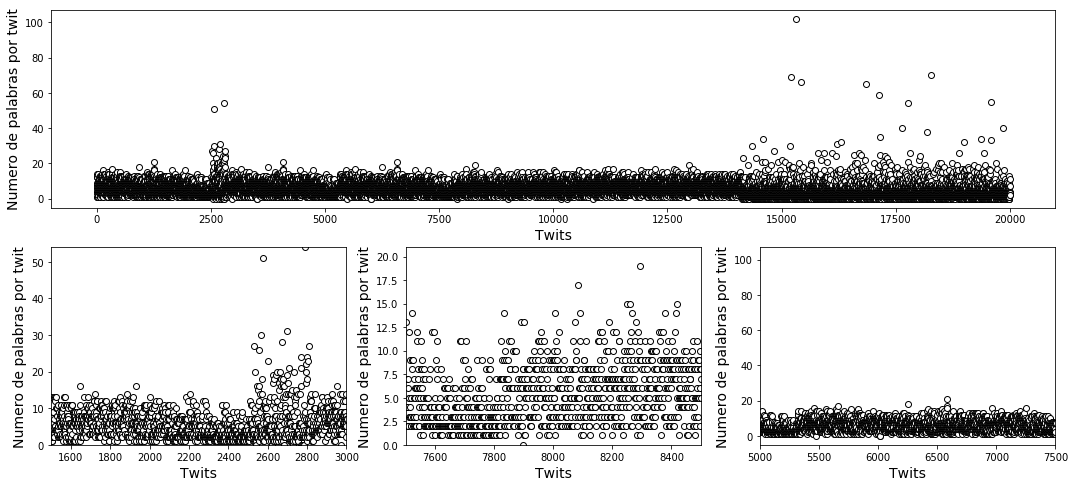

In [23]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize = (18,8))
ax_total = fig.add_subplot(gs[0,:])
ax_1 = fig.add_subplot(gs[1,0])
ax_2 = fig.add_subplot(gs[1,1])
ax_3 = fig.add_subplot(gs[1,2])
ax_total.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_total.set_xlabel('Twits',fontsize = 14)
ax_total.set_ylabel('Numero de palabras por twit',fontsize = 14)

ax_1.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_1.set_xlabel('Twits',fontsize = 14)
ax_1.set_ylabel('Numero de palabras por twit',fontsize = 14)
ax_1.set_xlim([1500,3000])
ax_1.set_ylim([0,max(n_words[1500:3000])])

ax_2.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_2.set_xlabel('Twits',fontsize = 14)
ax_2.set_ylabel('Numero de palabras por twit',fontsize = 14)
ax_2.set_xlim([7500,8500])
ax_2.set_ylim([0,max(n_words[7500:8500])])

ax_3.plot(data.index,n_words,marker='o',linestyle ='None',markeredgecolor = 'k',color = 'w')
ax_3.set_xlabel('Twits',fontsize = 14)
ax_3.set_ylabel('Numero de palabras por twit',fontsize = 14)
ax_3.set_xlim([5000,7500])
ax_2.set_ylim([0,max(n_words[5000:7500])])

Un número apropiado a tener en cuenta como cantidad máxima de las secuencias es de 25

In [24]:
Xpad=pad_sequences(X,padding='post',maxlen = 25)
voc=Xpad[0].size
print('El tamaño maximo de la secuencia es '+ str(Xpad[0].size))

El tamaño maximo de la secuencia es 25


In [25]:
np.array(X[4]),Xpad[4]

(array([241, 244, 670, 670,  76,  19]),
 array([241, 244, 670, 670,  76,  19,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       dtype=int32))

In [26]:
Xpad[0:4]

array([[   8,   10,  179,   67,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [ 669,   94,   10,  637,   38,   86,    6,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [   5,   49,   47,   96,  416, 1907,  452,  710,  322,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0],
       [  67,   42, 1102,   10, 1741,    1,  297,  923,  310,  792,  131,
         545,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0]], dtype=int32)

### 2.1.4 Análisis de la variable respuesta

Analicemos ahora la cantidad de datos por categoría que tenemos en la base de datos

In [18]:
y = []
for i in range(0,len(data)):
    y.append(int(data.annotation[i]['label'][0]))           #Extracting labels from our dataset (From the dictionary)
y = pd.DataFrame(y,columns = ['Label'])
y

,Label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [19]:
print(y.Label.unique())
for n, df in y.groupby(['Label']):
    print(n,df.Label.count())

[1 0]
(0, 12179)
(1, 7822)


Observamos que los datos presentan un desvalance en categorías, esto fue uno de los motivos por los cuales se optó por tener este desvalance en cuenta a la hora de entrenar el modelo final.

In [67]:
from keras.layers import Dense,LSTM,Dropout,GRU,SimpleRNN,Embedding
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [27]:
# 25% Para test
X_train, X_test, y_train, y_test = train_test_split(Xpad, y, test_size=0.25)

In [28]:
model_init =Sequential()
model_init.add(Embedding(2000,32,input_length=voc,mask_zero=True))
model_init.compile('adam','mse')
output=model_init.predict(Xpad)
output.shape

(20001, 25, 32)

### 2.1.5 Definamos el modelo

In [29]:
def Model_E2(embed_dim, lstm_out,input_len):
    model = Sequential()
    model.add(Embedding(2000, embed_dim,input_length=input_len,mask_zero=True))
    model.add(LSTM(units=lstm_out,input_shape=output.shape))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile('adam','mse',metrics = ['acc'])
    return model

In [30]:
embed_Dimensions = [32,64,128]
lstm_Outputs = [64,128,196]

Summary_model={emb_val:{lstm_val:{'acc':[],'val_acc':[],'predict':[],'observed':[]} for lstm_val in lstm_Outputs} for emb_val in embed_Dimensions}
Summary_model

{32: {64: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []},
  128: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []},
  196: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []}},
 64: {64: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []},
  128: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []},
  196: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []}},
 128: {64: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []},
  128: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []},
  196: {'acc': [], 'observed': [], 'predict': [], 'val_acc': []}}}

In [31]:
os.listdir(os.getcwd())

['Model_128_64.h5',
 'ProyectoU4.zip?dl=0.2',
 'Model_64_128.h5',
 'Proyecto 4 Version Final.ipynb',
 'Model_32_64.h5',
 'ProyectoU4.zip?dl=0',
 'Model_64_196.h5',
 'Model_128_128.h5',
 'Model_32_128.h5',
 'Model_64_64.h5',
 '__MACOSX',
 'Proyecto Final V1.ipynb',
 'Model_128_196.h5',
 'Dataset for Detection of Cyber-Trolls.json',
 'Model_32_196.h5',
 'ProyectoU4.zip?dl=0.1',
 'Summary_models.p',
 '.ipynb_checkpoints',
 'Proyecto Final V2.ipynb',
 'Image.jpg']

## 2.2 Entrenamiento de diferentes modelos

In [32]:
if Evaluar_Proyecto == 1:
    for embed_val,lstm_val in tqdm(itertools.product(embed_Dimensions, lstm_Outputs)):
        model=Model_E2(embed_val,lstm_val,voc)
        model_eval = model.fit(X_train, y_train, epochs = 12, batch_size=32, validation_data=(X_test,y_test))

        Summary_model[embed_val][lstm_val]['acc'] = model_eval.history['acc']
        Summary_model[embed_val][lstm_val]['val_acc'] = model_eval.history['val_acc']
        Summary_model[embed_val][lstm_val]['predict'] = model.predict(X_test)
        Summary_model[embed_val][lstm_val]['observed'] = y_test
        model.save('Model_'+str(embed_val)+'_'+str(lstm_val)+'.h5')

    pickle.dump(Summary_model, open("Summary_models.p","wb"))
else:
    print('Datos cargados. Se cargó un resumen de los modelos guardado previamente')
    Summary_model = pickle.load( open( "Summary_models.p", "rb" ) )


0it [00:00, ?it/s]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 67s 4ms/step - loss: 0.1943 - acc: 0.6898 - val_loss: 0.1753 - val_acc: 0.7277
Epoch 2/12
15000/15000 [==============================] - 59s 4ms/step - loss: 0.1531 - acc: 0.7787 - val_loss: 0.1689 - val_acc: 0.7522
Epoch 3/12
15000/15000 [==============================] - 53s 4ms/step - loss: 0.1340 - acc: 0.8175 - val_loss: 0.1641 - val_acc: 0.7702
Epoch 4/12
15000/15000 [==============================] - 37s 2ms/step - loss: 0.1211 - acc: 0.8386 - val_loss: 0.1586 - val_acc: 0.7832
Epoch 5/12
15000/15000 [==============================] - 36s 2ms/step - loss: 0.1107 - acc: 0.8563 - val_loss: 0.1543 - val_acc: 0.7942
Epoch 6/12
15000/15000 [==============================] - 31s 2ms/step - loss: 0.0990 - acc: 0.8749 - val_loss: 0.1512 - val_acc: 0.7964
Epoch 7/12
15000/15000 [==============================] - 30s 2ms/step - loss: 0.0895 - acc: 0.8917 - val_loss: 0.1501 - val_acc:


1it [07:58, 478.92s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 42s 3ms/step - loss: 0.1921 - acc: 0.6983 - val_loss: 0.1756 - val_acc: 0.7269
Epoch 2/12
15000/15000 [==============================] - 39s 3ms/step - loss: 0.1491 - acc: 0.7900 - val_loss: 0.1659 - val_acc: 0.7574
Epoch 3/12
15000/15000 [==============================] - 40s 3ms/step - loss: 0.1303 - acc: 0.8225 - val_loss: 0.1634 - val_acc: 0.7712
Epoch 4/12
15000/15000 [==============================] - 43s 3ms/step - loss: 0.1161 - acc: 0.8458 - val_loss: 0.1520 - val_acc: 0.7886
Epoch 5/12
15000/15000 [==============================] - 49s 3ms/step - loss: 0.1014 - acc: 0.8746 - val_loss: 0.1496 - val_acc: 0.8018
Epoch 6/12
15000/15000 [==============================] - 48s 3ms/step - loss: 0.0893 - acc: 0.8909 - val_loss: 0.1459 - val_acc: 0.8148
Epoch 7/12
15000/15000 [==============================] - 41s 3ms/step - loss: 0.0800 - acc: 0.9043 - val_loss: 0.1489 - val_acc:


2it [16:50, 505.48s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 69s 5ms/step - loss: 0.1939 - acc: 0.6921 - val_loss: 0.1740 - val_acc: 0.7337
Epoch 2/12
15000/15000 [==============================] - 71s 5ms/step - loss: 0.1524 - acc: 0.7815 - val_loss: 0.1686 - val_acc: 0.7558
Epoch 3/12
15000/15000 [==============================] - 55s 4ms/step - loss: 0.1358 - acc: 0.8183 - val_loss: 0.1662 - val_acc: 0.7550
Epoch 4/12
15000/15000 [==============================] - 55s 4ms/step - loss: 0.1192 - acc: 0.8453 - val_loss: 0.1550 - val_acc: 0.7824
Epoch 5/12
15000/15000 [==============================] - 57s 4ms/step - loss: 0.1043 - acc: 0.8664 - val_loss: 0.1538 - val_acc: 0.8034
Epoch 6/12
15000/15000 [==============================] - 56s 4ms/step - loss: 0.0922 - acc: 0.8861 - val_loss: 0.1447 - val_acc: 0.8136
Epoch 7/12
15000/15000 [==============================] - 55s 4ms/step - loss: 0.0812 - acc: 0.9038 - val_loss: 0.1424 - val_acc:


3it [28:43, 574.39s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 45s 3ms/step - loss: 0.1908 - acc: 0.6975 - val_loss: 0.1708 - val_acc: 0.7407
Epoch 2/12
15000/15000 [==============================] - 43s 3ms/step - loss: 0.1487 - acc: 0.7867 - val_loss: 0.1661 - val_acc: 0.7600
Epoch 3/12
15000/15000 [==============================] - 41s 3ms/step - loss: 0.1304 - acc: 0.8235 - val_loss: 0.1648 - val_acc: 0.7772
Epoch 4/12
15000/15000 [==============================] - 40s 3ms/step - loss: 0.1151 - acc: 0.8517 - val_loss: 0.1566 - val_acc: 0.7822
Epoch 5/12
15000/15000 [==============================] - 43s 3ms/step - loss: 0.0998 - acc: 0.8739 - val_loss: 0.1573 - val_acc: 0.7944
Epoch 6/12
15000/15000 [==============================] - 40s 3ms/step - loss: 0.0880 - acc: 0.8956 - val_loss: 0.1522 - val_acc: 0.8114
Epoch 7/12
15000/15000 [==============================] - 38s 3ms/step - loss: 0.0779 - acc: 0.9065 - val_loss: 0.1468 - val_acc:


4it [36:35, 548.88s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 44s 3ms/step - loss: 0.1902 - acc: 0.6999 - val_loss: 0.1731 - val_acc: 0.7361
Epoch 2/12
15000/15000 [==============================] - 41s 3ms/step - loss: 0.1495 - acc: 0.7843 - val_loss: 0.1627 - val_acc: 0.7620
Epoch 3/12
15000/15000 [==============================] - 42s 3ms/step - loss: 0.1273 - acc: 0.8257 - val_loss: 0.1579 - val_acc: 0.7878
Epoch 4/12
15000/15000 [==============================] - 42s 3ms/step - loss: 0.1073 - acc: 0.8593 - val_loss: 0.1493 - val_acc: 0.8008
Epoch 5/12
15000/15000 [==============================] - 41s 3ms/step - loss: 0.0930 - acc: 0.8832 - val_loss: 0.1467 - val_acc: 0.8140
Epoch 6/12
15000/15000 [==============================] - 44s 3ms/step - loss: 0.0804 - acc: 0.9047 - val_loss: 0.1425 - val_acc: 0.8210
Epoch 7/12
15000/15000 [==============================] - 42s 3ms/step - loss: 0.0703 - acc: 0.9180 - val_loss: 0.1405 - val_acc:


5it [45:10, 542.16s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 60s 4ms/step - loss: 0.1892 - acc: 0.7037 - val_loss: 0.1745 - val_acc: 0.7375
Epoch 2/12
15000/15000 [==============================] - 58s 4ms/step - loss: 0.1472 - acc: 0.7903 - val_loss: 0.1608 - val_acc: 0.7714
Epoch 3/12
15000/15000 [==============================] - 63s 4ms/step - loss: 0.1207 - acc: 0.8418 - val_loss: 0.1540 - val_acc: 0.7874
Epoch 4/12
15000/15000 [==============================] - 60s 4ms/step - loss: 0.1022 - acc: 0.8687 - val_loss: 0.1441 - val_acc: 0.8048
Epoch 5/12
15000/15000 [==============================] - 63s 4ms/step - loss: 0.0853 - acc: 0.8945 - val_loss: 0.1405 - val_acc: 0.8212
Epoch 6/12
15000/15000 [==============================] - 69s 5ms/step - loss: 0.0726 - acc: 0.9146 - val_loss: 0.1368 - val_acc: 0.8242
Epoch 7/12
15000/15000 [==============================] - 62s 4ms/step - loss: 0.0629 - acc: 0.9285 - val_loss: 0.1373 - val_acc:


6it [57:45, 577.54s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 39s 3ms/step - loss: 0.1886 - acc: 0.7041 - val_loss: 0.1705 - val_acc: 0.7339
Epoch 2/12
15000/15000 [==============================] - 40s 3ms/step - loss: 0.1460 - acc: 0.7933 - val_loss: 0.1659 - val_acc: 0.7495
Epoch 3/12
15000/15000 [==============================] - 44s 3ms/step - loss: 0.1238 - acc: 0.8351 - val_loss: 0.1535 - val_acc: 0.7856
Epoch 4/12
15000/15000 [==============================] - 43s 3ms/step - loss: 0.1023 - acc: 0.8704 - val_loss: 0.1461 - val_acc: 0.8060
Epoch 5/12
15000/15000 [==============================] - 46s 3ms/step - loss: 0.0865 - acc: 0.8942 - val_loss: 0.1429 - val_acc: 0.8206
Epoch 6/12
15000/15000 [==============================] - 43s 3ms/step - loss: 0.0739 - acc: 0.9144 - val_loss: 0.1383 - val_acc: 0.8280
Epoch 7/12
15000/15000 [==============================] - 48s 3ms/step - loss: 0.0637 - acc: 0.9315 - val_loss: 0.1385 - val_acc:


7it [1:06:21, 568.76s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 56s 4ms/step - loss: 0.1862 - acc: 0.7126 - val_loss: 0.1710 - val_acc: 0.7409
Epoch 2/12
15000/15000 [==============================] - 60s 4ms/step - loss: 0.1447 - acc: 0.7946 - val_loss: 0.1611 - val_acc: 0.7610
Epoch 3/12
15000/15000 [==============================] - 59s 4ms/step - loss: 0.1198 - acc: 0.8419 - val_loss: 0.1493 - val_acc: 0.7952
Epoch 4/12
15000/15000 [==============================] - 52s 3ms/step - loss: 0.0984 - acc: 0.8731 - val_loss: 0.1456 - val_acc: 0.8100
Epoch 5/12
15000/15000 [==============================] - 54s 4ms/step - loss: 0.0823 - acc: 0.8994 - val_loss: 0.1415 - val_acc: 0.8252
Epoch 6/12
15000/15000 [==============================] - 54s 4ms/step - loss: 0.0680 - acc: 0.9201 - val_loss: 0.1326 - val_acc: 0.8334
Epoch 7/12
15000/15000 [==============================] - 52s 3ms/step - loss: 0.0574 - acc: 0.9358 - val_loss: 0.1317 - val_acc:


8it [1:17:38, 582.28s/it]

Train on 15000 samples, validate on 5001 samples
Epoch 1/12
15000/15000 [==============================] - 82s 5ms/step - loss: 0.1862 - acc: 0.7085 - val_loss: 0.1771 - val_acc: 0.7139
Epoch 2/12
15000/15000 [==============================] - 76s 5ms/step - loss: 0.1437 - acc: 0.7967 - val_loss: 0.1599 - val_acc: 0.7628
Epoch 3/12
15000/15000 [==============================] - 78s 5ms/step - loss: 0.1193 - acc: 0.8403 - val_loss: 0.1538 - val_acc: 0.7906
Epoch 4/12
15000/15000 [==============================] - 77s 5ms/step - loss: 0.0976 - acc: 0.8759 - val_loss: 0.1436 - val_acc: 0.8106
Epoch 5/12
15000/15000 [==============================] - 74s 5ms/step - loss: 0.0793 - acc: 0.9030 - val_loss: 0.1405 - val_acc: 0.8202
Epoch 6/12
15000/15000 [==============================] - 77s 5ms/step - loss: 0.0653 - acc: 0.9253 - val_loss: 0.1355 - val_acc: 0.8316
Epoch 7/12
15000/15000 [==============================] - 82s 5ms/step - loss: 0.0549 - acc: 0.9396 - val_loss: 0.1363 - val_acc:

9it [1:32:35, 617.31s/it]


## 2.3 Comparación entre modelos

In [33]:
Summary_model = pickle.load( open( "Summary_models.p", "rb" ) )

In [34]:
for key in Summary_model.keys():
    for key_2 in Summary_model[key].keys():
        print(key,key_2,Summary_model[key][key_2].keys())

(32, 64, ['acc', 'predict', 'observed', 'val_acc'])
(32, 128, ['acc', 'predict', 'observed', 'val_acc'])
(32, 196, ['acc', 'predict', 'observed', 'val_acc'])
(64, 64, ['acc', 'predict', 'observed', 'val_acc'])
(64, 128, ['acc', 'predict', 'observed', 'val_acc'])
(64, 196, ['acc', 'predict', 'observed', 'val_acc'])
(128, 64, ['acc', 'predict', 'observed', 'val_acc'])
(128, 128, ['acc', 'predict', 'observed', 'val_acc'])
(128, 196, ['acc', 'predict', 'observed', 'val_acc'])


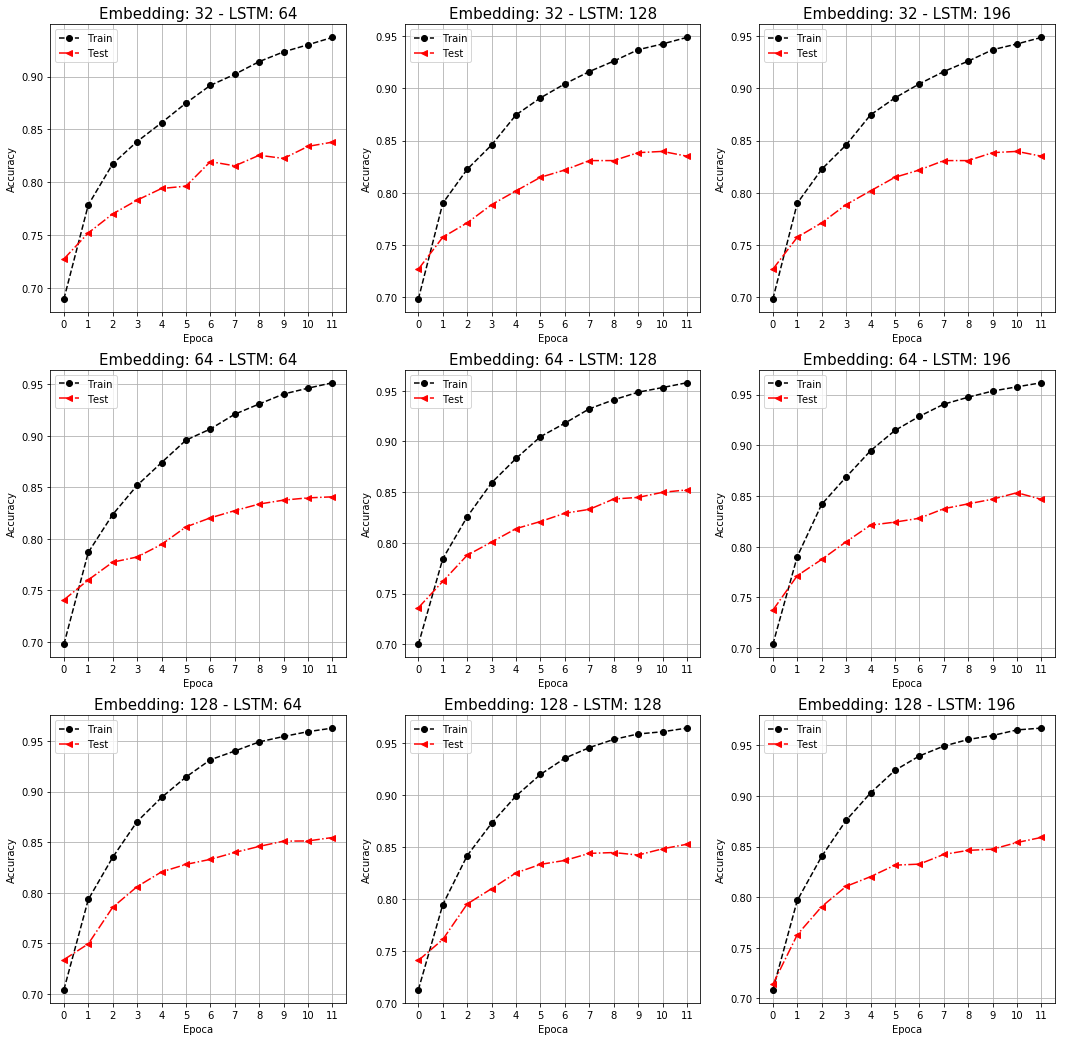

In [35]:
fig,ax = plt.subplots(3,3,figsize = (18,18))

ax[0,0].set_title('Embedding: 32 - LSTM: 64',fontsize = 15)
ax[0,0].plot(np.arange(12),Summary_model[32][64]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[0,0].plot(np.arange(12),Summary_model[32][64]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[0,0].legend()
ax[0,0].set_xticks(np.arange(12))
ax[0,0].set_xlabel('Epoca')
ax[0,0].set_ylabel('Accuracy')
ax[0,0].grid()

ax[0,1].set_title('Embedding: 32 - LSTM: 128',fontsize = 15)
ax[0,1].plot(np.arange(12),Summary_model[32][128]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[0,1].plot(np.arange(12),Summary_model[32][128]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[0,1].legend()
ax[0,1].set_xticks(np.arange(12))
ax[0,1].set_xlabel('Epoca')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].grid()

ax[0,2].set_title('Embedding: 32 - LSTM: 196',fontsize = 15)
ax[0,2].plot(np.arange(12),Summary_model[32][128]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[0,2].plot(np.arange(12),Summary_model[32][128]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[0,2].legend()
ax[0,2].set_xticks(np.arange(12))
ax[0,2].set_xlabel('Epoca')
ax[0,2].set_ylabel('Accuracy')
ax[0,2].grid()

ax[1,0].set_title('Embedding: 64 - LSTM: 64',fontsize = 15)
ax[1,0].plot(np.arange(12),Summary_model[64][64]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[1,0].plot(np.arange(12),Summary_model[64][64]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[1,0].legend()
ax[1,0].set_xticks(np.arange(12))
ax[1,0].set_xlabel('Epoca')
ax[1,0].set_ylabel('Accuracy')
ax[1,0].grid()

ax[1,1].set_title('Embedding: 64 - LSTM: 128',fontsize = 15)
ax[1,1].plot(np.arange(12),Summary_model[64][128]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[1,1].plot(np.arange(12),Summary_model[64][128]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[1,1].legend()
ax[1,1].set_xticks(np.arange(12))
ax[1,1].set_xlabel('Epoca')
ax[1,1].set_ylabel('Accuracy')
ax[1,1].grid()

ax[1,2].set_title('Embedding: 64 - LSTM: 196',fontsize = 15)
ax[1,2].plot(np.arange(12),Summary_model[64][196]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[1,2].plot(np.arange(12),Summary_model[64][196]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[1,2].legend()
ax[1,2].set_xticks(np.arange(12))
ax[1,2].set_xlabel('Epoca')
ax[1,2].set_ylabel('Accuracy')
ax[1,2].grid()

ax[2,0].set_title('Embedding: 128 - LSTM: 64',fontsize = 15)
ax[2,0].plot(np.arange(12),Summary_model[128][64]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[2,0].plot(np.arange(12),Summary_model[128][64]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[2,0].legend()
ax[2,0].set_xticks(np.arange(12))
ax[2,0].set_xlabel('Epoca')
ax[2,0].set_ylabel('Accuracy')
ax[2,0].grid()

ax[2,1].set_title('Embedding: 128 - LSTM: 128',fontsize = 15)
ax[2,1].plot(np.arange(12),Summary_model[128][128]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[2,1].plot(np.arange(12),Summary_model[128][128]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[2,1].legend()
ax[2,1].set_xticks(np.arange(12))
ax[2,1].set_xlabel('Epoca')
ax[2,1].set_ylabel('Accuracy')
ax[2,1].grid()

ax[2,2].set_title('Embedding: 128 - LSTM: 196',fontsize = 15)
ax[2,2].plot(np.arange(12),Summary_model[128][196]['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[2,2].plot(np.arange(12),Summary_model[128][196]['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[2,2].legend()
ax[2,2].set_xticks(np.arange(12))
ax[2,2].set_xlabel('Epoca')
ax[2,2].set_ylabel('Accuracy')
ax[2,2].grid()

In [36]:
if Presentar_Widgets == 1:
    import ipywidgets as ipw
    from ipywidgets import widgets,interact

    from bokeh.io import push_notebook,show,output_notebook
    from bokeh.plotting import figure
    from bokeh.layouts import gridplot

    from bokeh.resources import INLINE
    import bokeh.io
    bokeh.io.output_notebook(INLINE)

    import warnings
    warnings.filterwarnings('ignore')

Loading BokehJS ...

In [71]:
if Presentar_Widgets == 1:
    TOOLS = "pan,box_zoom,reset,wheel_zoom,save"

    Embedding_wid = widgets.Select(options=Summary_model.keys(),value=list(Summary_model.keys())[0],description='Embedding',
                               disabled=False,layout=ipw.Layout(width='20%'))
    LSTM_wid = widgets.Select(options=Summary_model[32].keys(),value=list(Summary_model[32].keys())[0],description='LSTM',
                          disabled=False,layout=ipw.Layout(width='20%'))

    Des_wid = widgets.Text(value='Embedding and LSTM',placeholder='Type something',description='',disabled=False)
    ui = widgets.HBox([Embedding_wid,LSTM_wid,Des_wid])#,wid_vars_Dekati

    x=[]
    y=[]

    hei=350
    wid=480

    fig_1=figure(title='Embbeding Train',plot_height=hei,plot_width=wid,tools=TOOLS)
    fig_2=figure(title='LSTM Train',plot_height=hei,plot_width=wid)

    fig_1_test=figure(title='Embbeding Test',plot_height=hei,plot_width=wid,tools=TOOLS)
    fig_2_test=figure(title='LSTM Test',plot_height=hei,plot_width=wid)

    Emb_64 = fig_1.line(x, y, color='blue',line_width=1,legend = 'LSTM: 64')
    Emb_128 = fig_1.line(x, y, color='red',line_width=1,legend = 'LSTM: 128')
    Emb_196 = fig_1.line(x, y, color='black',line_width=1,legend = 'LSTM: 196')

    Emb_64_c = fig_1.circle(x, y, color='blue',size=8,legend = 'LSTM: 64')
    Emb_128_c = fig_1.circle(x, y, color='red',size=8,legend = 'LSTM: 128')
    Emb_196_c = fig_1.circle(x, y, color='black',size=8,legend = 'LSTM: 196')

    LSTM_32 = fig_2.line(x, y, color='orange',line_width=1,legend = 'Embedding: 32')
    LSTM_64 = fig_2.line(x, y, color='green',line_width=1,legend = 'Embedding: 64')
    LSTM_128 = fig_2.line(x, y, color='yellow',line_width=1,legend = 'Embedding: 128')

    LSTM_32_c = fig_2.circle(x, y, color='orange',size=8,legend = 'Embedding: 32')
    LSTM_64_c = fig_2.circle(x, y, color='green',size=8,legend = 'Embedding: 64')
    LSTM_128_c = fig_2.circle(x, y, color='yellow',size=8,legend = 'Embedding: 128')

    Emb_64_test = fig_1_test.line(x, y, color='blue',line_width=1,legend = 'LSTM: 64')
    Emb_128_test = fig_1_test.line(x, y, color='red',line_width=1,legend = 'LSTM: 128')
    Emb_196_test = fig_1_test.line(x, y, color='black',line_width=1,legend = 'LSTM: 196')

    Emb_64_c_test = fig_1_test.triangle(x, y, color='blue',size=8,legend = 'LSTM: 64')
    Emb_128_c_test = fig_1_test.triangle(x, y, color='red',size=8,legend = 'LSTM: 128')
    Emb_196_c_test = fig_1_test.triangle(x, y, color='black',size=8,legend = 'LSTM: 196')

    LSTM_32_test = fig_2_test.line(x, y, color='orange',line_width=1,legend = 'Embedding: 32')
    LSTM_64_test = fig_2_test.line(x, y, color='green',line_width=1,legend = 'Embedding: 64')
    LSTM_128_test = fig_2_test.line(x, y, color='yellow',line_width=1,legend = 'Embedding: 128')

    LSTM_32_c_test = fig_2_test.triangle(x, y, color='orange',size=8,legend = 'Embedding: 32')
    LSTM_64_c_test = fig_2_test.triangle(x, y, color='green',size=8,legend = 'Embedding: 64')
    LSTM_128_c_test = fig_2_test.triangle(x, y, color='yellow',size=8,legend = 'Embedding: 128')

    def update(Embed,Lstm):
        Des_wid.value = 'Embeding: '+str(Embed)+' - LSTM: '+str(Lstm)
        Emb_64.data_source.data['x'] = np.arange(12)
        Emb_64.data_source.data['y'] = Summary_model[Embed][64]['acc']
        Emb_64_c.data_source.data['x'] = np.arange(12)
        Emb_64_c.data_source.data['y'] = Summary_model[Embed][64]['acc']

        Emb_128.data_source.data['x'] = np.arange(12)
        Emb_128.data_source.data['y'] = Summary_model[Embed][128]['acc']
        Emb_128_c.data_source.data['x'] = np.arange(12)
        Emb_128_c.data_source.data['y'] = Summary_model[Embed][128]['acc']

        Emb_196.data_source.data['x'] = np.arange(12)
        Emb_196.data_source.data['y'] = Summary_model[Embed][196]['acc']
        Emb_196_c.data_source.data['x'] = np.arange(12)
        Emb_196_c.data_source.data['y'] = Summary_model[Embed][196]['acc']

        LSTM_32.data_source.data['x'] = np.arange(12)
        LSTM_32.data_source.data['y'] = Summary_model[32][Lstm]['acc']
        LSTM_32_c.data_source.data['x'] = np.arange(12)
        LSTM_32_c.data_source.data['y'] = Summary_model[32][Lstm]['acc']

        LSTM_64.data_source.data['x'] = np.arange(12)
        LSTM_64.data_source.data['y'] = Summary_model[64][Lstm]['acc']
        LSTM_64_c.data_source.data['x'] = np.arange(12)
        LSTM_64_c.data_source.data['y'] = Summary_model[64][Lstm]['acc']

        LSTM_128.data_source.data['x'] = np.arange(12)
        LSTM_128.data_source.data['y'] = Summary_model[128][Lstm]['acc']
        LSTM_128_c.data_source.data['x'] = np.arange(12)
        LSTM_128_c.data_source.data['y'] = Summary_model[128][Lstm]['acc']

        Emb_64_test.data_source.data['x'] = np.arange(12)
        Emb_64_test.data_source.data['y'] = Summary_model[Embed][64]['val_acc']
        Emb_64_c_test.data_source.data['x'] = np.arange(12)
        Emb_64_c_test.data_source.data['y'] = Summary_model[Embed][64]['val_acc']

        Emb_128_test.data_source.data['x'] = np.arange(12)
        Emb_128_test.data_source.data['y'] = Summary_model[Embed][128]['val_acc']
        Emb_128_c_test.data_source.data['x'] = np.arange(12)
        Emb_128_c_test.data_source.data['y'] = Summary_model[Embed][128]['val_acc']

        Emb_196_test.data_source.data['x'] = np.arange(12)
        Emb_196_test.data_source.data['y'] = Summary_model[Embed][196]['val_acc']
        Emb_196_c_test.data_source.data['x'] = np.arange(12)
        Emb_196_c_test.data_source.data['y'] = Summary_model[Embed][196]['val_acc']

        LSTM_32_test.data_source.data['x'] = np.arange(12)
        LSTM_32_test.data_source.data['y'] = Summary_model[32][Lstm]['val_acc']
        LSTM_32_c_test.data_source.data['x'] = np.arange(12)
        LSTM_32_c_test.data_source.data['y'] = Summary_model[32][Lstm]['val_acc']

        LSTM_64_test.data_source.data['x'] = np.arange(12)
        LSTM_64_test.data_source.data['y'] = Summary_model[64][Lstm]['val_acc']
        LSTM_64_c_test.data_source.data['x'] = np.arange(12)
        LSTM_64_c_test.data_source.data['y'] = Summary_model[64][Lstm]['val_acc']

        LSTM_128_test.data_source.data['x'] = np.arange(12)
        LSTM_128_test.data_source.data['y'] = Summary_model[128][Lstm]['val_acc']
        LSTM_128_c_test.data_source.data['x'] = np.arange(12)
        LSTM_128_c_test.data_source.data['y'] = Summary_model[128][Lstm]['val_acc']

        push_notebook()

    out = widgets.interactive_output(update, {'Embed':Embedding_wid,'Lstm':LSTM_wid})
    display (ui,out)
    show(gridplot([[fig_1,fig_2],[fig_1_test,fig_2_test]]),notebook_handle=True)

SEJveChjaGlsZHJlbj0oU2VsZWN0KGRlc2NyaXB0aW9uPXUnRW1iZWRkaW5nJywgbGF5b3V0PUxheW91dCh3aWR0aD11JzIwJScpLCBvcHRpb25zPSgzMiwgNjQsIDEyOCksIHZhbHVlPTMyKSzigKY=


Output()

No encontramos muchas diferencias a primera vista de los resultados debido a que se obtienen precisiones muy altas. Los comportamientos del entrenamiento se pueden comparar con la pequeña interfaz presentada anteriormente. En esta encontramos que:
- Una capa Embbeding con 128 elementos de salida y con cualquier elemento de salida de la capa LSTM presenta mejor accuracy por grupo.
- Independiente de la cantidad de elementos de salida de la capa Embbeding y con 128 capas del LSTM se tiene mejor accuracy por grupo, tanto para train como para test.
- Entre grupos, con 196 elementos de salida de la capa del LSTM y con 128 capas del Embbeding se tiene el mejor accuracy.

### Evaluemos la clasificación

Para esto, creemos un dataframe que contenga el accuracy de cada modelo

In [38]:
from sklearn.metrics import classification_report, accuracy_score

In [39]:
Accuracys = pd.DataFrame(columns = Summary_model.keys(),index = Summary_model[32].keys())
Zero_clasfiqued = Accuracys.copy()
One_clasifiqued = Accuracys.copy()
Accuracys

,32,64,128
64,NaN,NaN,NaN
128,NaN,NaN,NaN
196,NaN,NaN,NaN


In [40]:
for embed in Summary_model.keys():
    for lstm_ot in Summary_model[embed].keys():
        #print(embed,lstm_ot)
        y_test = Summary_model[embed][lstm_ot]['observed']
        df_y_test = pd.DataFrame(y_test.values,columns = ['Y_test'])
        for nam, df_t in df_y_test.groupby(['Y_test']):
            print(nam,df_t.Y_test.count())

(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)
(0, 3014)
(1, 1987)


In [45]:
Dic_y_pred = {}
for embed in Summary_model.keys():
    Dic_y_pred[embed] = {}
    for lstm_ot in Summary_model[embed].keys():
        #print(embed,lstm_ot)
        y_pred = Summary_model[embed][lstm_ot]['predict'] 
        y_pred[y_pred<0.5]=0
        y_pred[y_pred>0.5]=1
        flat_y_pred = [ys[0] for ys in y_pred]
        df_y_pred = pd.DataFrame(flat_y_pred,columns = ['Y_pred'])
        for nam,df_p in df_y_pred.groupby(['Y_pred']):
            if int(nam) == 0:
                Zero_clasfiqued.loc[lstm_ot,embed]=df_p.Y_pred.count()
            else:
                One_clasifiqued.loc[lstm_ot,embed]=df_p.Y_pred.count()
        Accuracys.loc[lstm_ot,embed]=accuracy_score(y_test, flat_y_pred)
        Dic_y_pred[embed][lstm_ot] = df_y_pred

In [46]:
Accuracys

,32,64,128
64,0.838432,0.841032,0.855229
128,0.835033,0.85243,0.852829
196,0.840232,0.846631,0.859028


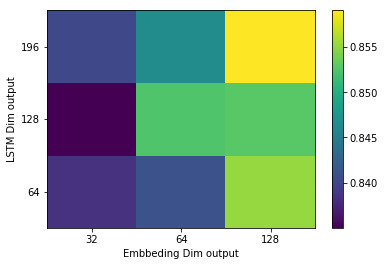

In [53]:
plt.figure()
plt.pcolor(Accuracys.astype(float))
plt.colorbar()
_=plt.xticks(0.5+np.arange(3),Accuracys.columns)
_=plt.yticks(0.5+np.arange(3),Accuracys.index)
_=plt.xlabel('Embbeding Dim output')
_=plt.ylabel('LSTM Dim output')

Creemos una matriz de confusión para cada modelo.

In [54]:
from sklearn.metrics import confusion_matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

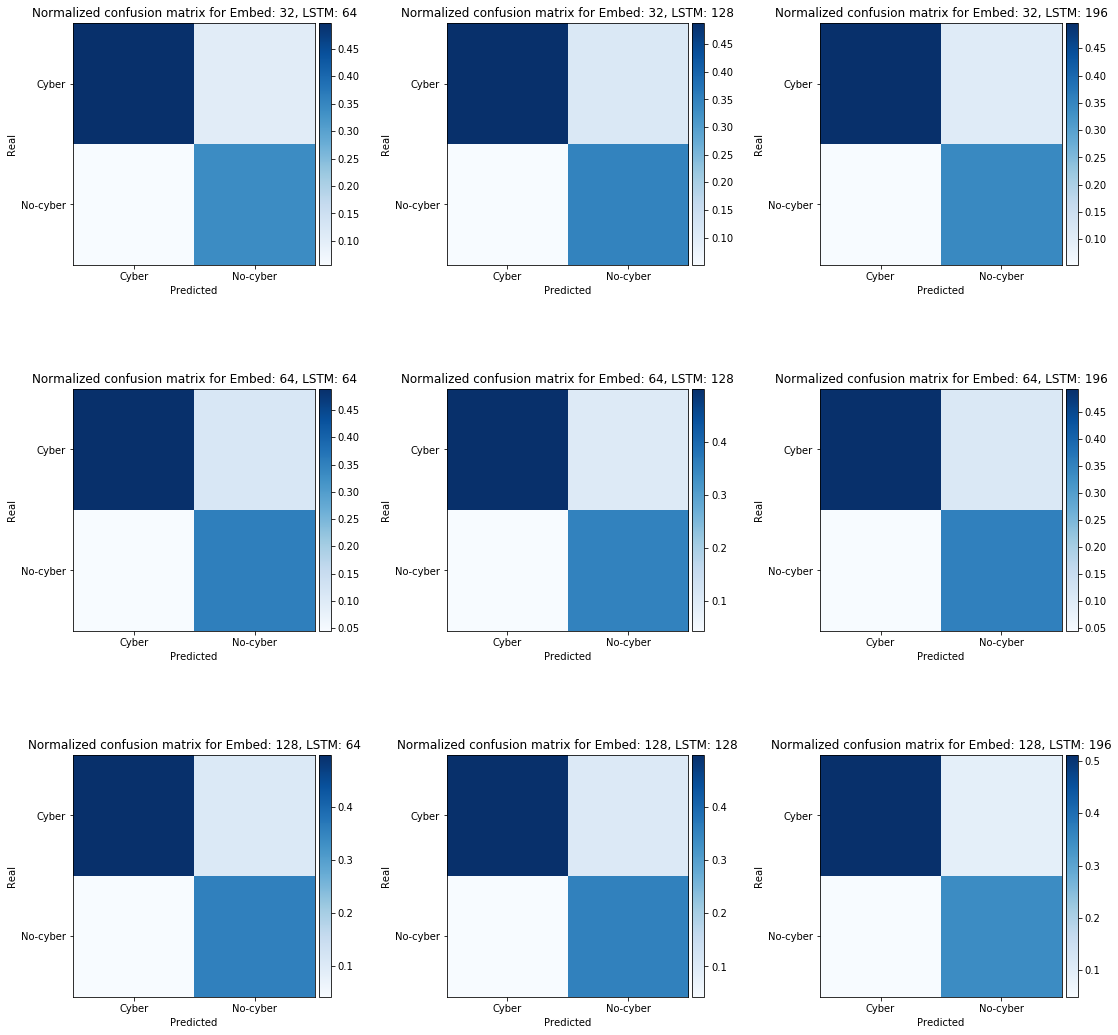

In [61]:
tick_marks = np.arange(2)
fig,ax = plt.subplots(3,3,figsize = (18,18))

cm=confusion_matrix(df_y_test.values,Dic_y_pred[32][64].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[0,0].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[0,0].set_title('Normalized confusion matrix for Embed: 32, LSTM: 64')
ax[0,0].set_xticks(tick_marks)
ax[0,0].set_xticklabels(['Cyber','No-cyber'])
ax[0,0].set_yticks(tick_marks)
ax[0,0].set_yticklabels(['Cyber','No-cyber'])
ax[0,0].set_xlabel('Predicted')
ax[0,0].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[32][128].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[0,1].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[0,1].set_title('Normalized confusion matrix for Embed: 32, LSTM: 128')
ax[0,1].set_xticks(tick_marks)
ax[0,1].set_xticklabels(['Cyber','No-cyber'])
ax[0,1].set_yticks(tick_marks)
ax[0,1].set_yticklabels(['Cyber','No-cyber'])
ax[0,1].set_xlabel('Predicted')
ax[0,1].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[32][196].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[0,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[0,2].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[0,2].set_title('Normalized confusion matrix for Embed: 32, LSTM: 196')
ax[0,2].set_xticks(tick_marks)
ax[0,2].set_xticklabels(['Cyber','No-cyber'])
ax[0,2].set_yticks(tick_marks)
ax[0,2].set_yticklabels(['Cyber','No-cyber'])
ax[0,2].set_xlabel('Predicted')
ax[0,2].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[64][64].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[1,0].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[1,0].set_title('Normalized confusion matrix for Embed: 64, LSTM: 64')
ax[1,0].set_xticks(tick_marks)
ax[1,0].set_xticklabels(['Cyber','No-cyber'])
ax[1,0].set_yticks(tick_marks)
ax[1,0].set_yticklabels(['Cyber','No-cyber'])
ax[1,0].set_xlabel('Predicted')
ax[1,0].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[64][128].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[1,1].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[1,1].set_title('Normalized confusion matrix for Embed: 64, LSTM: 128')
ax[1,1].set_xticks(tick_marks)
ax[1,1].set_xticklabels(['Cyber','No-cyber'])
ax[1,1].set_yticks(tick_marks)
ax[1,1].set_yticklabels(['Cyber','No-cyber'])
ax[1,1].set_xlabel('Predicted')
ax[1,1].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[64][196].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[1,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[1,2].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[1,2].set_title('Normalized confusion matrix for Embed: 64, LSTM: 196')
ax[1,2].set_xticks(tick_marks)
ax[1,2].set_xticklabels(['Cyber','No-cyber'])
ax[1,2].set_yticks(tick_marks)
ax[1,2].set_yticklabels(['Cyber','No-cyber'])
ax[1,2].set_xlabel('Predicted')
ax[1,2].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[128][64].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[2,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[2,0].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[2,0].set_title('Normalized confusion matrix for Embed: 128, LSTM: 64')
ax[2,0].set_xticks(tick_marks)
ax[2,0].set_xticklabels(['Cyber','No-cyber'])
ax[2,0].set_yticks(tick_marks)
ax[2,0].set_yticklabels(['Cyber','No-cyber'])
ax[2,0].set_xlabel('Predicted')
ax[2,0].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[128][128].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[2,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[2,1].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[2,1].set_title('Normalized confusion matrix for Embed: 128, LSTM: 128')
ax[2,1].set_xticks(tick_marks)
ax[2,1].set_xticklabels(['Cyber','No-cyber'])
ax[2,1].set_yticks(tick_marks)
ax[2,1].set_yticklabels(['Cyber','No-cyber'])
ax[2,1].set_xlabel('Predicted')
ax[2,1].set_ylabel('Real')

cm=confusion_matrix(df_y_test.values,Dic_y_pred[128][196].values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax[2,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax[2,2].imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax[2,2].set_title('Normalized confusion matrix for Embed: 128, LSTM: 196')
#ax[0,0].colorbar()
ax[2,2].set_xticks(tick_marks)
ax[2,2].set_xticklabels(['Cyber','No-cyber'])
ax[2,2].set_yticks(tick_marks)
ax[2,2].set_yticklabels(['Cyber','No-cyber'])
ax[2,2].set_xlabel('Predicted')
ax[2,2].set_ylabel('Real')

fig.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.1,top = 0.9,wspace = 0.45,hspace = 0.2)

### Definamos un modelo nuevo con base en los resultados previos.

Este modelo varía en en que se tiene un recurrent_dropout = 0.2 para la capa LSTM(), en que la función de activación para la capa densa es una relu y la función de perdida es una crosentropía binaria. Adicionalmente, se aumentó el número de epocas.

In [75]:
model = Sequential()
model.add(Embedding(2000, 128,input_length=voc,mask_zero=True))
model.add(LSTM(units=196,input_shape=output.shape,recurrent_dropout = 0.2))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='relu'))
model.compile('adam',loss = 'binary_crossentropy',metrics = ['acc'])
model_eval = model.fit(X_train, y_train, epochs = 25, batch_size=32, validation_data=(X_test,y_test),class_weight = {0:1,1:0.6})

Train on 15000 samples, validate on 5001 samples
Epoch 1/25
15000/15000 [==============================] - 88s 6ms/step - loss: 0.4439 - acc: 0.6561 - val_loss: 0.5865 - val_acc: 0.7029
Epoch 2/25
15000/15000 [==============================] - 89s 6ms/step - loss: 0.4050 - acc: 0.7358 - val_loss: 0.6793 - val_acc: 0.7502
Epoch 3/25
15000/15000 [==============================] - 77s 5ms/step - loss: 0.3697 - acc: 0.7761 - val_loss: 0.7377 - val_acc: 0.7475
Epoch 4/25
15000/15000 [==============================] - 84s 6ms/step - loss: 0.3556 - acc: 0.7973 - val_loss: 0.7391 - val_acc: 0.7586
Epoch 5/25
15000/15000 [==============================] - 81s 5ms/step - loss: 0.3361 - acc: 0.8101 - val_loss: 0.8020 - val_acc: 0.7598
Epoch 6/25
15000/15000 [==============================] - 84s 6ms/step - loss: 0.3233 - acc: 0.8191 - val_loss: 0.8327 - val_acc: 0.7644
Epoch 7/25
15000/15000 [==============================] - 83s 6ms/step - loss: 0.3369 - acc: 0.8160 - val_loss: 0.9251 - val_acc:

Es curioso como se ve afectado el problema al cambiar tres cosas en la metodología de solución del problema:
- recurrent_dropout = 0.2en la capa LSTM
- Cambiar la función de activación por defecto que tiene la capa Dense() por una función de activaciòn relu
- Cambiar la función de perdida de una mse por una binaria cross-entropía.

Estos tres parámetros afectan el desempeño del accuracy, restringiendoló a una predicción de máximo un 85%. Dentro de los futuros análisis que se pueden hacer es evaluar que efecto tiene cada uno de estos parámetros de forma individual.

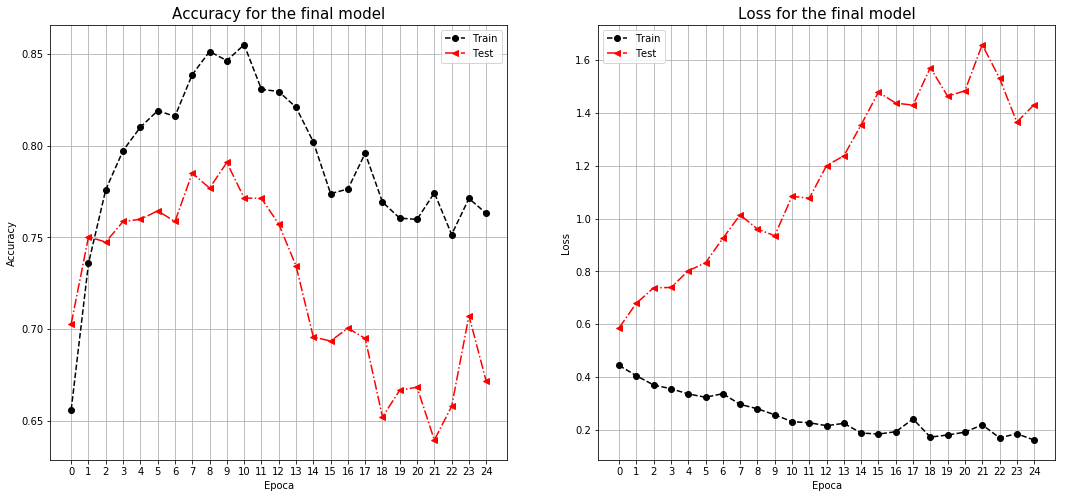

In [81]:
fig,ax = plt.subplots(1,2,figsize = (18,8))

ax[0].set_title('Accuracy for the final model',fontsize = 15)
ax[0].plot(np.arange(25),model_eval.history['acc'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[0].plot(np.arange(25),model_eval.history['val_acc'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[0].legend()
ax[0].set_xticks(np.arange(25))
ax[0].set_xlabel('Epoca')
ax[0].set_ylabel('Accuracy')
ax[0].grid()

ax[1].set_title('Loss for the final model',fontsize = 15)
ax[1].plot(np.arange(25),model_eval.history['loss'],marker = 'o',label = 'Train',color = 'k',linestyle = '--')
ax[1].plot(np.arange(25),model_eval.history['val_loss'],marker = '<',label = 'Test',color = 'r',linestyle = '-.')
ax[1].legend()
ax[1].set_xticks(np.arange(25))
ax[1].set_xlabel('Epoca')
ax[1].set_ylabel('Loss')
ax[1].grid()

In [82]:
predic_final = model.predict(X_test)

In [86]:
predic_final
predic_final[predic_final<0.5]=0
predic_final[predic_final>0.5]=1
df_y_pred_final = pd.DataFrame([ys[0] for ys in predic_final],columns = ['Y_pred'])
for nam,df_p in df_y_pred_final.groupby(['Y_pred']):
    print(nam,df_p.Y_pred.count())

(0.0, 2948)
(1.0, 2053)


Text(0,0.5,u'Real')

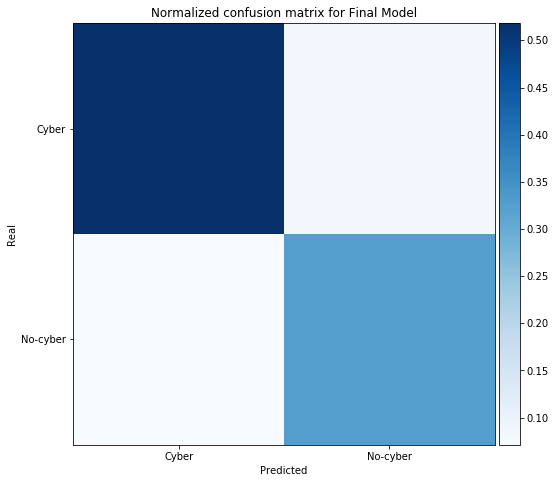

In [88]:
tick_marks = np.arange(2)
fig,ax = plt.subplots(figsize = (8,8))

cm=confusion_matrix(df_y_test.values,df_y_pred_final.values)
cm = cm/np.sum(cm)
cmap=plt.cm.Blues
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_title('Normalized confusion matrix for Final Model')
ax.set_xticks(tick_marks)
ax.set_xticklabels(['Cyber','No-cyber'])
ax.set_yticks(tick_marks)
ax.set_yticklabels(['Cyber','No-cyber'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Real')

In [92]:
from sklearn.metrics import classification_report, accuracy_score

target_names = ['Non Cyber-Aggresive','Cyber.Agressive']
print(classification_report(df_y_test.values,df_y_pred_final.values, target_names=target_names))   #Results

                     precision    recall  f1-score   support

Non Cyber-Aggresive       0.88      0.86      0.87      3014
    Cyber.Agressive       0.79      0.82      0.81      1987

        avg / total       0.85      0.84      0.84      5001



Lo que se busca hacer con esta última celda es evaluar el problema cambiando la función de activación de la capa Densa. Para este caso se usó una softmax. En este caso el valor del accuracy en las primeras iteraciones de las epocas bajó a un 38% lo que da indicios de que este es un parámetro muy sensible a la hora de definir el modelo. En particular, presentó más bajos resultados en comparación con los modelos previos y los modelos,

In [91]:
model = Sequential()
model.add(Embedding(2000, 128,input_length=voc,mask_zero=True))
model.add(LSTM(units=196,input_shape=output.shape,recurrent_dropout = 0.2))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='softmax'))
model.compile('adam',loss = 'binary_crossentropy',metrics = ['acc'])
model_eval = model.fit(X_train, y_train, epochs = 15, batch_size=32, validation_data=(X_test,y_test),class_weight = {0:1,1:0.6})

Train on 15000 samples, validate on 5001 samples
Epoch 1/15
15000/15000 [==============================] - 91s 6ms/step - loss: 9.7408 - acc: 0.3890 - val_loss: 9.6081 - val_acc: 0.3973
Epoch 2/15
 8640/15000 [================>.............] - ETA: 27s - loss: 9.7813 - acc: 0.3865

KeyboardInterrupt: 